In [1]:
"""
Name: Gustavo Bartholomeu Trad Souza
USP number: 11219216
Course code: SCC0251
Year/Semester: 2020/1
Title: Assignment 2 : Image Enhancement and Filtering

"""

#Import the necessary modules
import numpy as np
import imageio

In [2]:
#Method 1 - Bilateral Filter
def bilateral(img, n, ts, tr):
    #FILTER CREATION
    #Create a zeros matrix with the size of the filter
    w = np.zeros((n, n))
    #Get the center index of the filter
    a = int((n-1)/2)
    #Genearte the values on the filter based on the spatial Gaussian component
    for i in range(n):
        for j in range(n):
            #E = sqrt(x² + y²)
            E = np.sqrt(float((i - a)**2) + float((j - a)**2))
            #E = ((i - a)**2) + ((j - a)**2)
            w[i, j] = gausKernel(E, ts)
    # flipped filter
    w = np.flip( np.flip(w, 0) , 1)
    #--------------------------------------------
    #OUTPUT IMAGE CREATION
    #Get the dimensions of the original image
    N,M = img.shape
    # new image to store filtered pixels
    g_out = np.zeros(img.shape)
    #Create the new image with zeros and copy the original image but with zero padding
    g = np.zeros((N+(a*2), M+(a*2)))
    i = 0
    for x in range(a, np.shape(g)[0] - a):
        j = 0
        for y in range(a, np.shape(g)[1] - a):
            g[x, y] = img[i, j]
            j += 1
        i += 1
    #--------------------------------------------
    #CONVOLUTION PROCESS
    # for every pixel
    for x in range(N):
        for y in range(M):
            If, Wp = 0, 0
            # gets subimage
            sub_f = g[x : x+n , y : y+n]
            #Get the value of the center pixel of the sub image
            I = sub_f[a, a]
            for i in range(np.shape(sub_f)[0]):
                for j in range(np.shape(sub_f)[1]):
                    gri = gausKernel(sub_f[i, j] - I, tr)
                    wi = gri * w[i , j]
                    Wp = Wp + wi
                    If += (wi * sub_f[i, j])
            If /= Wp
            g_out[x, y] = If
                    
    return g_out
#---------------------------------------------------------------------------------------------
#Gaussian Kernel formula for a given x and a theta t
def gausKernel(x, t):
    return ((1 / (2 * np.pi * (t**2))) * np.exp(-((x**2) / (2 * (t**2)))))

In [3]:
#Method 2 - Unsharp mask using the Laplacian Filter
def unsharpLap(img, c, k_opt):
    #Select the Laplacian filter
    if(k_opt == 1):
        w = np.matrix([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]).astype(np.float)
    elif(k_opt == 2):
        w = np.matrix([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]).astype(np.float)
    #--------------------------------------------   
    #OUTPUT IMAGE CREATION
    n = np.shape(w)[0]
    a = int((n-1)/2)
    #Get the dimensions of the original image
    N,M = img.shape
    # new image to store filtered pixels
    g_out = np.zeros(img.shape)
    #Create the new image with zeros and copy the original image but with zero padding
    g = np.zeros((N+(a*2), M+(a*2)))
    i = 0
    for x in range(a, np.shape(g)[0] - a):
        j = 0
        for y in range(a, np.shape(g)[1] - a):
            g[x, y] = img[i, j]
            j += 1
        i += 1
    #--------------------------------------------  
    #CONVOLUTION
    w = np.flip( np.flip(w, 0) , 1)
    for x in range(N):
        for y in range(M):
            sub_f = g[x : x+n , y : y+n]
            g_out[x,y] = np.sum( np.multiply(sub_f, w))
            
    g_out = normalization(g_out)
    g_out = np.add((c * g_out), img)
    g_out = normalization(g_out)

    return g_out
#---------------------------------------------------------------------------------------------    
#Normalization function
def normalization(img, val = 255):
    img = img.astype(np.float)
    amax, amin = np.amax(img), np.amin(img)
    return ((img - amin)/(amax))*val

In [4]:
#Method 3 - Vignette Filter
def vignette(img, tr, tc):
    #FILTERS CREATION
    N,M = img.shape
    kr = np.zeros((1,N))
    if(N%2 == 0): a = int((N/2)-1)
    else: a = int((N-1)/2)
    kc = np.zeros((1,M))
    if(M%2 == 0): b = int((M/2)-1)
    else: b = int((M-1)/2)
    for i in range(N):
        kr[0][i] = gausKernel(i - a, tr)
    for i in range(M):
        kc[0][i] = gausKernel(i - b, tc)
    kr = kr.T
    k = np.matmul(kr, kc)
    #--------------------------------------------  
    #MULTIPICATION BY THE IMAGE
    g_out = np.multiply(k, img)
    g_out = normalization(g_out)
    
    return g_out

In [5]:
#MAIN PROGRAM
def main():
    filename = str(input()).rstrip()
    filepath = "" # Save the file path, if the path changes, just change this variable

    in_img = imageio.imread(filepath+filename)
    in_img = in_img.astype(np.float) # Convert the image to float type

    method = int(input())

    save = int(input())

    if(method == 1):
        n = int(input())
        ts = float(input())
        tr = float(input())
        out_img = bilateral(in_img, n, ts, tr).astype(np.uint8)
    elif(method == 2):
        c = float(input())
        kernel = int(input())
        out_img = unsharpLap(in_img, c, kernel).astype(np.uint8)
    elif(method == 3):
        tr = float(input())
        tc = float(input())
        out_img = vignette(in_img, tr, tc)

    RSE = np.sqrt(np.sum(np.power(np.subtract(out_img.astype(np.float), in_img.astype(np.float)), 2)))
    print("%.4f"%RSE)

    if (save == 1):
        out_img = out_img #Convert the transformed image to uint8 type
        imageio.imwrite(filepath+'output_img.png',out_img)
    
    return in_img, out_img

In [6]:
#Function to plot the images and vizualize the rsults
import matplotlib.pyplot as plt
def plotImgs(img1, img2, figsize = (12, 12), cmap='gray'): # Function to plot the two images
    plt.figure(figsize=figsize) 
 
    plt.subplot(121) 
    plt.imshow(img1, cmap=cmap)
    plt.axis('off') 
    
    plt.subplot(122) 
    plt.imshow(img2, cmap=cmap)
    plt.axis('off')

 camera.png
 1
 0
 3
 150
 100


3429.3615


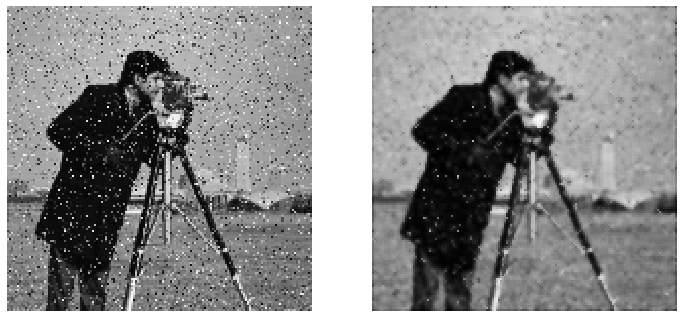

In [7]:
#Ex 1
inp, out = main()
plotImgs(inp, out)

 moon.png
 1
 0
 5
 50
 100


1787.2361


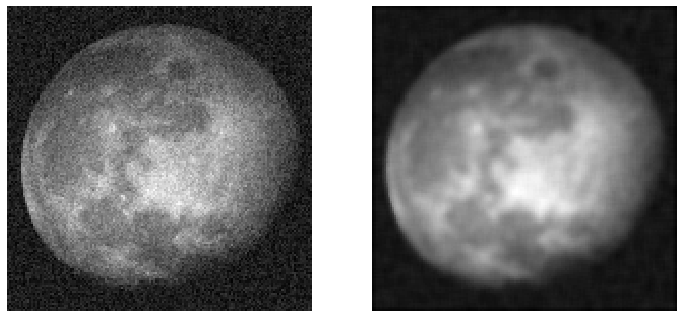

In [8]:
#Ex 2
inp, out = main()
plotImgs(inp, out)

 arara.png
 2
 0
 0.5
 1


4827.9672


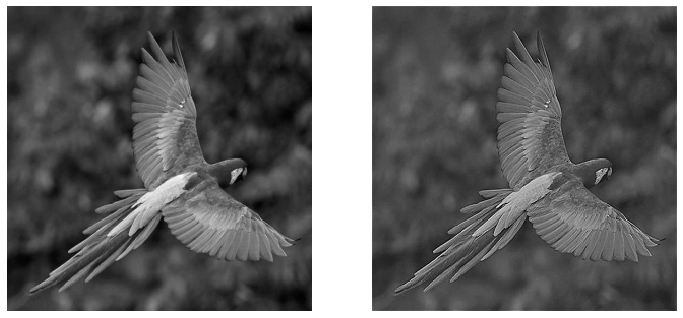

In [10]:
#Ex 3
inp, out = main()
plotImgs(inp, out)

 arara.png
 2
 0
 0.75
 2


6893.6062


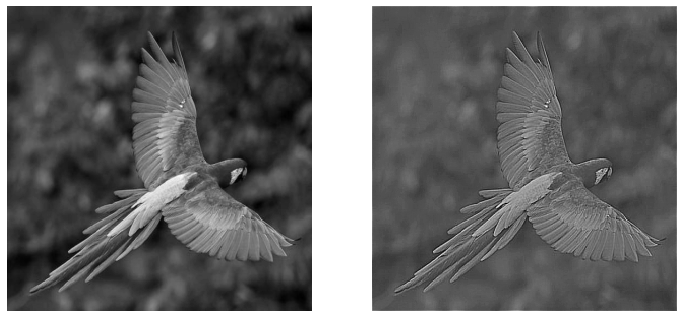

In [11]:
#Ex 4
inp, out = main()
plotImgs(inp, out)

 flower.png
 3
 0
 50
 50


16972.4239


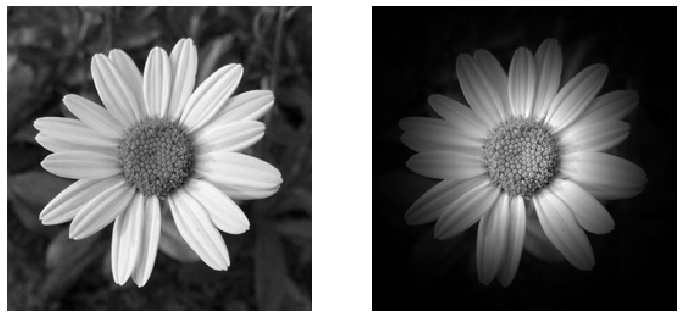

In [12]:
#Ex 5
inp, out = main()
plotImgs(inp, out)

 airplane.png
 3
 0
 30
 45


20391.1069


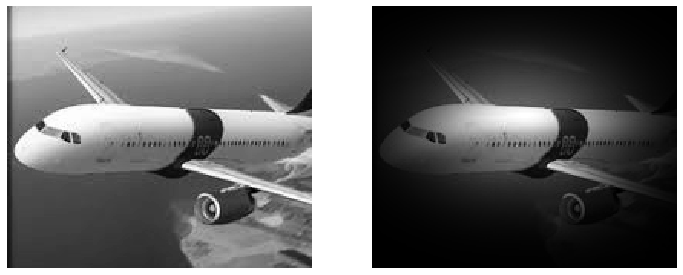

In [13]:
#Ex 6
inp, out = main()
plotImgs(inp, out)